# Finding Heavy Traffic Indicators on I-94

In this project we'll analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

## The I-94 Traffic Dataset

John Hogue made the dataset available, and you can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume).

Let's explore data

In [1]:
import pandas as pd

i_94_traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

i_94_traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i_94_traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
i_94_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


We can see that the dataset has **48,204 rows** and **9 columns**, it doesn't contain Null values and has mixed column types (string, int, float).

Let's describe the values of the columns using the [dataset documentation](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume):

- `holiday` - US National holidays plus regional holiday, Minnesota State Fair
- `temp` - Average temp in kelvin
- `rain_1h` - Amount in mm of rain that occurred in the hour
- `snow_1h` - Amount in mm of snow that occurred in the hour
- `clouds_all` - Percentage of cloud cover
- `weather_main` - Short textual description of the current weather
- `weather_description` - Longer textual description of the current weather
- `date_time` - Hour of the data collected in local CST time
- `traffic_volume` - Hourly I-94 ATR 301 reported westbound traffic volume

From the descriptions, we can assume that all the columns may help us research.

## Analyzing Traffic Volume

From the additional information in the [dataset documentation](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume), we know that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

Let's generate plot graph for `traffic_volume` column and analyze it

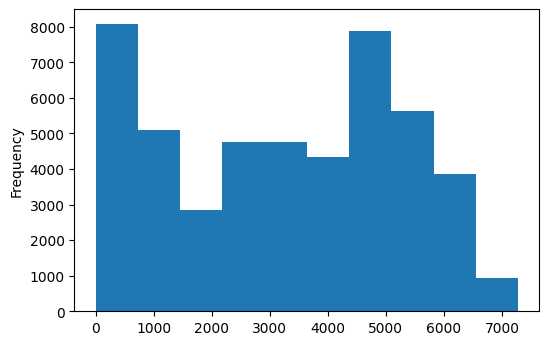

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

i_94_traffic['traffic_volume'].plot.hist()
plt.show()

In [5]:
i_94_traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Approximately 25% of the time, the traffic volume passing the station each hour was 1,193 cars or fewer. This lower traffic volume is often observed during periods such as the night or when road construction activities occur. However, about 75% of the time, the traffic volume was significantly higher, reaching at least 4,933 cars or more. This suggests that the traffic volume is substantially greater most of the time, potentially indicating peak hours or busier periods of the day.

Let's explore the effect of the time of day on the volume of traffic.

## Traffic Volume: Day vs. Night

We'll start by dividing the dataset into two parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [6]:
i_94_traffic['date_time'] = pd.to_datetime(i_94_traffic['date_time'])

# daytime - 7 to 19
# nighttime - 19 to 7

i_94_traffic_copy = i_94_traffic.copy()

daytime = (i_94_traffic['date_time'].dt.hour >= 7) & (i_94_traffic['date_time'].dt.hour < 19)
nighttime = ~(daytime)

day_traffic = i_94_traffic_copy[daytime]
night_traffic = i_94_traffic_copy[nighttime]

print(day_traffic.info())
print('\n')
print(night_traffic.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.8+ MB
None


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24327 entries, 10 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------

Despite the fact that the range time is the same for day and night (12 hours), we see a noticeable scatter in the number of lines between them, this is explained by the absence of data for several hours. In particular, if we consider lines 176 and 177 (i_94_traffic.iloc[176:178]), it becomes obvious that there is a gap of two hours in the data (4 and 5).

## Traffic Volume: Day vs. Night (II)

Now we're going to compare the traffic volume at night and during day.

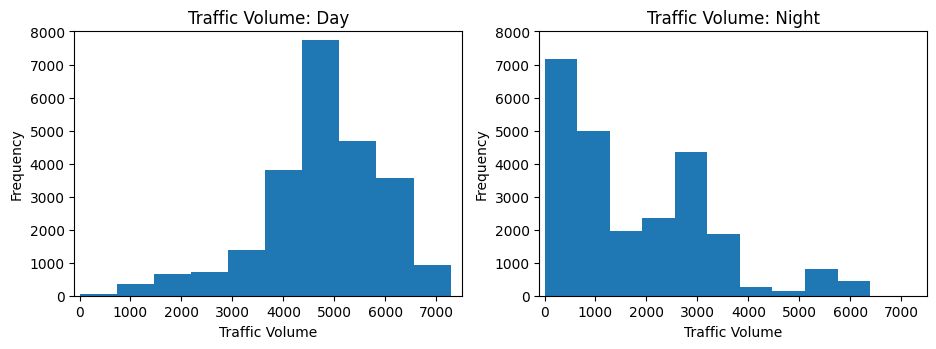

In [7]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(day_traffic['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night_traffic['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [8]:
day_traffic['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [9]:
night_traffic['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram for the day is similar in shape to a left-skewed distribution. The histogram for the night is similar in shape to a right-skewed distribution.

If we compare the 75 percentile, we can see that the daytime traffic is almost twice as heavy.

Given that our objective is to identify indicators of heavy traffic, it is reasonable to exclude nighttime data from our analysis. This is because the volume of traffic during nighttime tends to be significantly lower compared to daytime, and focusing on daytime data will provide a more accurate representation of heavy traffic patterns.

## Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day. Let's start from month.

In [10]:
day_traffic.loc[:, 'month'] = day_traffic.loc[:, 'date_time'].dt.month # to create a new column where each value describes the month when the traffic volume measurement was taken
by_month = day_traffic.groupby('month').mean() # to group the dataset by the month column with the mean as an aggregate function
by_month['traffic_volume']

/dataquest/system/env/python3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/dataquest/system/env/python3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

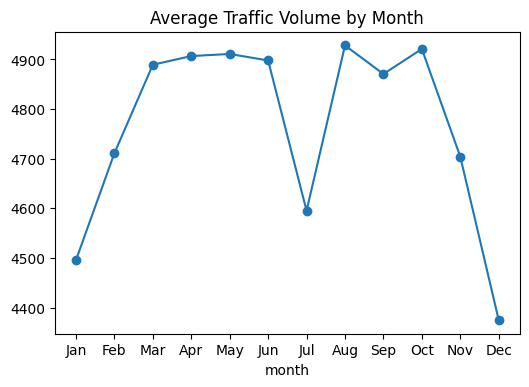

In [11]:
by_month['traffic_volume'].plot(title='Average Traffic Volume by Month', kind='line', marker='o')
by_month.index
plt.xticks(by_month.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

We can see from the graph that the heaviest traffic is in two periods: from March to June and from August to October. In December, January and July, the intensity of traffic decreases significantly compared to other months. In general, we can see that traffic is less heavy during the cold winter months. The slump in July is probably due to the fact that a lot of people are leaving the country for vacation.

## Time Indicators (II)

Before, we generated a line plot showing how the traffic volume changed each month on average. We'll now continue with building line plots for another time unit: day of the week. To get the traffic volume averages for each day of the week, we'll need to use the following code:

/dataquest/system/env/python3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/dataquest/system/env/python3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



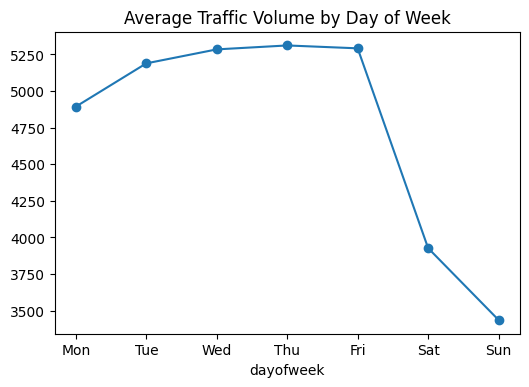

In [12]:
day_traffic.loc[:, 'dayofweek'] = day_traffic.loc[:, 'date_time'].dt.dayofweek
by_dayofweek = day_traffic.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot(title='Average Traffic Volume by Day of Week', kind='line', marker='o')
plt.xticks(by_dayofweek.index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

We see a big difference between business days and the weekend; it's obviously connected to the fact that on business days, people go to work.

## Time Indicators (III)

Before, we found that the traffic volume is significantly heavier on business days compared to the weekends. We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend. Below, we show you how to split the dataset so you can focus on plotting the graphs. While your variable names may vary, the logic of the code should be the same.

In [13]:
day_traffic['hour'] = day_traffic['date_time'].dt.hour
day_traffic_copy = day_traffic.copy()
business_days = day_traffic_copy[day_traffic['dayofweek'] <= 4] # 4 == Friday
weekend = day_traffic_copy[day_traffic['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

<ipython-input-13-ce7b00d024f0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


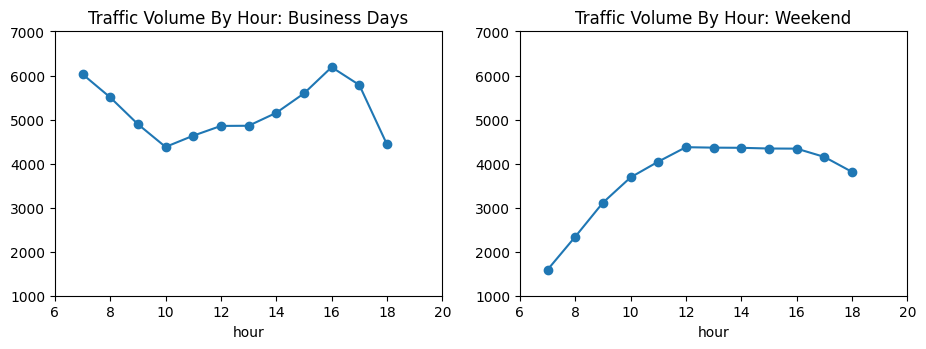

In [14]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot(marker='o')
plt.xlim(6, 20)
plt.ylim(1000, 7000)
plt.title('Traffic Volume By Hour: Business Days')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot(marker='o')
plt.xlim(6, 20)
plt.ylim(1000, 7000)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

We can observe two rush hours on business days: the first one is at 7 AM, and the second one is at 4 PM. These are the times when people go to work and return home. It makes sense that there is heavy traffic volume during these hours. On weekends, we don't see a clear rush hour, but we do notice low traffic in the morning. We can assume that it's because people tend to sleep more on weekends.

## The effect of time on traffic. Conclusions

Above we've explored how time (time refers not only to hours, but also to days of the week and months) affects traffic volume, now we can draw some conclusions:

1. The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
2. The traffic is usually heavier on business days compared to weekends.
3. On business days, the rush hours are around 7 and 16.

## Weather Indicators

We investigated how time affects traffic volume. Let's now examine the impact of weather conditions.

In our dataset, we have several columns with weather data:

- `temp`
- `rain_1h`
- `snow_1h`
- `clouds_all`
- `weather_main`
- `weather_description`

Columns `temp`, `rain_1h`, `snow_1h`, `clouds_all` are numerical. So we can find correlation between these values and `traffic_volume`.

In [17]:
day_traffic.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Strongest correlation is with `temp` column. Let's plot a scatter plot.

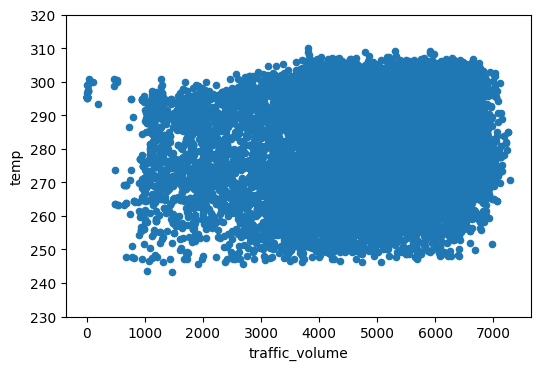

In [18]:
day_traffic.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()

Looking at this scatter plot we can conclude that temperature has little effect on traffic volume.

## Weather Types

Let's now explore the non-numeric weather columns. It's `weather_main` and `weather_description`.

In [25]:
by_weather_main = day_traffic.groupby('weather_main').mean()
by_weather_description = day_traffic.groupby('weather_description').mean()

print(by_weather_main)
print('\n')
print(by_weather_description)

                    temp   rain_1h   snow_1h  clouds_all  traffic_volume  \
weather_main                                                               
Clear         283.812078  0.000000  0.000000    1.670265     4778.416260   
Clouds        282.929274  0.000000  0.000000   62.667548     4865.415996   
Drizzle       284.456433  0.170804  0.000000   84.704417     4837.212911   
Fog           277.579641  0.163840  0.001409   65.477901     4372.491713   
Haze          275.319353  0.040036  0.000000   64.000000     4609.893285   
Mist          279.420825  0.249992  0.000825   74.961435     4623.976475   
Rain          287.089601  3.972943  0.000292   75.870116     4815.568462   
Smoke         292.405833  0.878333  0.000000   53.333333     4564.583333   
Snow          267.984505  0.014017  0.001768   80.501376     4396.321183   
Squall        296.730000  1.020000  0.000000   75.000000     4211.000000   
Thunderstorm  293.364678  1.146475  0.000000   75.184035     4648.212860   

           

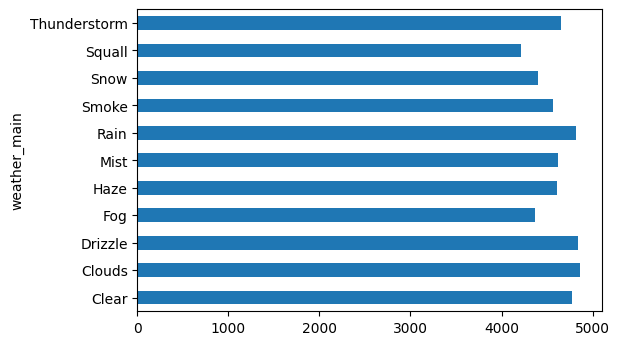

In [26]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

Weather type is not a reliable indicator of heavy traffic.

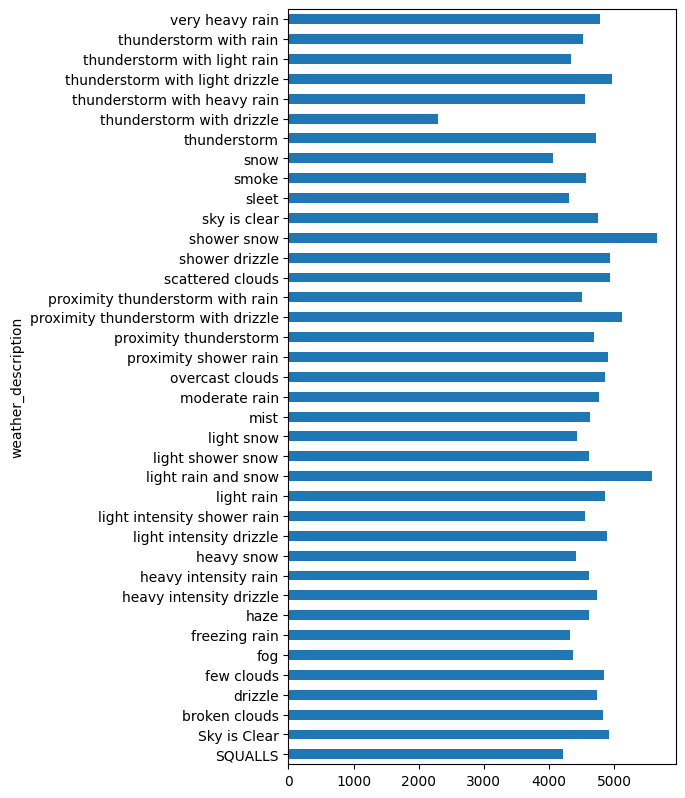

In [27]:
by_weather_description = day_traffic.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

Traffic exceeds 5,000 in only three types of weather conditions:

- `shower snow`
- `light rain and snow`
- `proximity thunderstorm with drizzle`

This may be due to the fact that such weather conditions are not the most favorable for walking or cycling, so people prefer to use their cars or cabs.

## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

- Time indicators
    - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    - The traffic is usually heavier on business days compared to the weekends.
    - On business days, the rush hours are around 7 and 16.
- Weather indicators
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle